In [2]:
import numpy as np
import pandas as pd

#### the goal of the notebook the make some data pipelines in order to use MAGE AI to tranfer the data from dsv file to being used in BigQuery. 

- This to analysize from the following data model

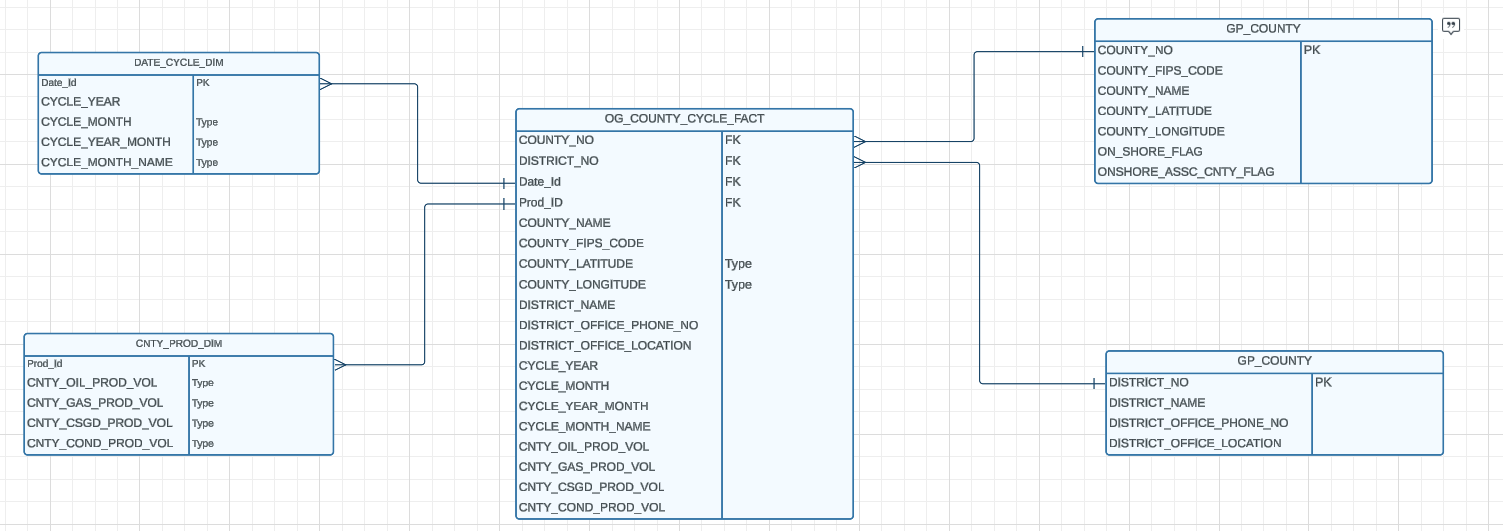

- get the production amount per County for each Oil, Gas , Condebsate, and CSGD
- Slider the shows the prodution per time, so we need to covert the datetime right
- Line Chart shows all counties production per Year and show different colors for each Type of production.
- Location per county and show a Bubble on the map of each county based on the productions. (Need more research)
- Also get production amout per month

In [3]:
df_district = pd.read_csv("./PDQ_DSV/GP_DISTRICT_DATA_TABLE.dsv",delimiter="}",low_memory=False)
df_gp_county = pd.read_csv("./PDQ_DSV/GP_COUNTY_DATA_TABLE.dsv",delimiter="}",low_memory=False)
df_og_county_cycle = pd.read_csv("./PDQ_DSV/OG_COUNTY_CYCLE_DATA_TABLE.dsv",delimiter="}",low_memory=False)
df_us_counties = pd.read_csv("./US_Counties/uscounties.csv",low_memory = False)

## cleaning up NANs

In [4]:
df_district.dropna(axis = 1,inplace=True)
df_gp_county.dropna(axis = 1,inplace=True)
df_og_county_cycle.dropna(axis = 1,inplace=True)
df_us_counties.dropna(axis = 1,inplace=True)

In [5]:
df_og_county_cycle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224328 entries, 0 to 224327
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   COUNTY_NO           224328 non-null  int64 
 1   DISTRICT_NO         224328 non-null  int64 
 2   CYCLE_YEAR          224328 non-null  int64 
 3   CYCLE_MONTH         224328 non-null  int64 
 4   CYCLE_YEAR_MONTH    224328 non-null  int64 
 5   CNTY_OIL_PROD_VOL   224328 non-null  int64 
 6   CNTY_GAS_PROD_VOL   224328 non-null  int64 
 7   CNTY_COND_PROD_VOL  224328 non-null  int64 
 8   CNTY_CSGD_PROD_VOL  224328 non-null  int64 
 9   COUNTY_NAME         224328 non-null  object
 10  DISTRICT_NAME       224328 non-null  object
 11  OIL_GAS_CODE        224328 non-null  object
dtypes: int64(9), object(3)
memory usage: 20.5+ MB


In [6]:
df_us_counties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   county        3143 non-null   object 
 1   county_ascii  3143 non-null   object 
 2   county_full   3143 non-null   object 
 3   county_fips   3143 non-null   int64  
 4   state_id      3143 non-null   object 
 5   state_name    3143 non-null   object 
 6   lat           3143 non-null   float64
 7   lng           3143 non-null   float64
 8   population    3143 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 221.1+ KB


In [7]:
df_us_counties.head()

,county,county_ascii,county_full,county_fips,state_id,state_name,lat,lng,population
0,Los Angeles,Los Angeles,Los Angeles County,6037,CA,California,34.3209,-118.2247,10019635
1,Cook,Cook,Cook County,17031,IL,Illinois,41.8401,-87.8168,5265398
2,Harris,Harris,Harris County,48201,TX,Texas,29.8577,-95.3936,4697957
3,Maricopa,Maricopa,Maricopa County,4013,AZ,Arizona,33.3490,-112.4915,4367186
4,San Diego,San Diego,San Diego County,6073,CA,California,33.0343,-116.7350,3296317


In [8]:
cond = df_us_counties["county"] == "Anderson" 
cond2 = df_us_counties["state_id"] == "TX"

In [9]:
df_us_counties[cond & cond2]

,county,county_ascii,county_full,county_fips,state_id,state_name,lat,lng,population
896,Anderson,Anderson,Anderson County,48001,TX,Texas,31.8133,-95.6525,58133


### Problem to solve: map the logitutde and the latitude with GP_county table ✅

In [10]:
df_district.head()
df_district.rename(columns={'DISTRICT_NO': 'DISTRICT_ID'}, inplace=True)

In [11]:
df_district

,DISTRICT_ID,DISTRICT_NAME,OFFICE_PHONE_NO,OFFICE_LOCATION
0,1,01,2102271313,San Antonio
1,2,02,2102271313,San Antonio
2,3,03,7138695001,Houston
3,4,04,3612423113,Corpus Christi
4,5,05,9039843026,Kilgore
5,6,06,9039843026,Kilgore
6,7,6E,9039843026,Kilgore
7,8,7B,9156773545,Abilene
8,9,7C,9156577450,San Angelo
9,10,08,9156845581,Midland


In [12]:
df_gp_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   COUNTY_NO               277 non-null    int64 
 1   COUNTY_FIPS_CODE        277 non-null    int64 
 2   COUNTY_NAME             277 non-null    object
 3   DISTRICT_NO             277 non-null    int64 
 4   DISTRICT_NAME           277 non-null    object
 5   ON_SHORE_FLAG           277 non-null    object
 6   ONSHORE_ASSC_CNTY_FLAG  277 non-null    object
dtypes: int64(3), object(4)
memory usage: 15.3+ KB


In [13]:
df_gp_county[df_gp_county["COUNTY_NO"] == 1]

,COUNTY_NO,COUNTY_FIPS_CODE,COUNTY_NAME,DISTRICT_NO,DISTRICT_NAME,ON_SHORE_FLAG,ONSHORE_ASSC_CNTY_FLAG
263,1,1,ANDERSON,6,06,Y,N


In [14]:
df_og_county_cycle.head()

,COUNTY_NO,DISTRICT_NO,CYCLE_YEAR,CYCLE_MONTH,CYCLE_YEAR_MONTH,CNTY_OIL_PROD_VOL,CNTY_GAS_PROD_VOL,CNTY_COND_PROD_VOL,CNTY_CSGD_PROD_VOL,COUNTY_NAME,DISTRICT_NAME,OIL_GAS_CODE
0,1,5,1993,1,199301,7355,0,0,6347,ANDERSON,05,O
1,1,5,1993,2,199302,6312,0,0,4919,ANDERSON,05,O
2,1,5,1993,3,199303,6222,0,0,4973,ANDERSON,05,O
3,1,5,1993,4,199304,6139,0,0,4410,ANDERSON,05,O
4,1,5,1993,5,199305,5785,0,0,5961,ANDERSON,05,O


In [15]:
df_og_county_cycle.DISTRICT_NAME.unique()

array(['05', '06', '09', '7C', '08', '8A', '03', '02', '04', '7B', '10',
       '01', '6E'], dtype=object)

In [16]:
df_district.DISTRICT_NAME.unique()

array(['01', '02', '03', '04', '05', '06', '6E', '7B', '7C', '08', '8A',
       '09', '10', '20'], dtype=object)

In [17]:
df_us_counties_Teaxes = df_us_counties[cond2]

In [18]:
df_us_counties_Teaxes

,county,county_ascii,county_full,county_fips,state_id,state_name,lat,lng,population
2,Harris,Harris,Harris County,48201,TX,Texas,29.8577,-95.3936,4697957
8,Dallas,Dallas,Dallas County,48113,TX,Texas,32.7666,-96.7778,2604722
14,Tarrant,Tarrant,Tarrant County,48439,TX,Texas,32.7719,-97.2911,2091953
15,Bexar,Bexar,Bexar County,48029,TX,Texas,29.4489,-98.5200,1990522
33,Travis,Travis,Travis County,48453,TX,Texas,30.3344,-97.7820,1267795
...,...,...,...,...,...,...,...,...,...
3128,Kent,Kent,Kent County,48263,TX,Texas,33.1813,-100.7776,632
3133,Borden,Borden,Borden County,48033,TX,Texas,32.7436,-101.4317,550
3139,King,King,King County,48269,TX,Texas,33.6165,-100.2558,229
3140,Kenedy,Kenedy,Kenedy County,48261,TX,Texas,26.9285,-97.7017,169


In [28]:
df_us_counties_Teaxes.county

county
HARRIS       1
JACK         1
OCHILTREE    1
DUVAL        1
SABINE       1
            ..
HALE         1
TITUS        1
BEE          1
KLEBERG      1
LOVING       1
Name: count, Length: 254, dtype: int64

In [27]:
df_gp_county.COUNTY_NAME.value_counts()

COUNTY_NAME
PALO PINTO    1
BRAZOS-LB     1
HIGH IS-E     1
HIGH IS-S     1
HIGH IS-LB    1
             ..
BAYLOR        1
CLAY          1
COOKE         1
DENTON        1
PANOLA        1
Name: count, Length: 277, dtype: int64

In [20]:
df_gp_county.drop(["DISTRICT_NO","DISTRICT_NAME"] ,axis = 1,inplace=True)

In [21]:
df_gp_county.head()

,COUNTY_NO,COUNTY_FIPS_CODE,COUNTY_NAME,ON_SHORE_FLAG,ONSHORE_ASSC_CNTY_FLAG
0,363,363,PALO PINTO,Y,N
1,367,367,PARKER,Y,N
2,411,411,SAN SABA,Y,N
3,417,417,SHACKELFORD,Y,N
4,425,425,SOMERVELL,Y,N


In [22]:
df_us_counties_Teaxes['county'] = df_us_counties_Teaxes['county'].apply(lambda x: str.upper(x))
county_mapping = df_us_counties_Teaxes.set_index('county')[['lat','lng']]

/var/folders/vj/dgz2wyk921xclx0sxv35wbpc0000gn/T/ipykernel_1259/2790510540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us_counties_Teaxes['county'] = df_us_counties_Teaxes['county'].apply(lambda x: str.upper(x))


In [23]:
county_mapping

,lat,lng
county,,
HARRIS,29.8577,-95.3936
DALLAS,32.7666,-96.7778
TARRANT,32.7719,-97.2911
BEXAR,29.4489,-98.5200
TRAVIS,30.3344,-97.7820
...,...,...
KENT,33.1813,-100.7776
BORDEN,32.7436,-101.4317
KING,33.6165,-100.2558


In [59]:
df_gp_county["COUNTY_LATITUDE"] = df_gp_county["COUNTY_NAME"].map(county_mapping['lat'])
df_gp_county["COUNTY_LONGITUDE"] = df_gp_county["COUNTY_NAME"].map(county_mapping['lng'])

## now let's re-arrange the table as shown in the data model

In [145]:
df_gp_county = df_gp_county[["COUNTY_NO","COUNTY_NAME","COUNTY_LATITUDE","COUNTY_LONGITUDE","COUNTY_FIPS_CODE","ON_SHORE_FLAG","ONSHORE_ASSC_CNTY_FLAG"]]
df_gp_county.rename(columns={'COUNTY_NO': 'COUNTY_ID'},inplace = True)

In [146]:
df_gp_county

,COUNTY_ID,COUNTY_NAME,COUNTY_LATITUDE,COUNTY_LONGITUDE,COUNTY_FIPS_CODE,ON_SHORE_FLAG,ONSHORE_ASSC_CNTY_FLAG
0,363,PALO PINTO,32.7532,-98.3130,363,Y,N
1,367,PARKER,32.7776,-97.8051,367,Y,N
2,411,SAN SABA,31.1552,-98.8176,411,Y,N
3,417,SHACKELFORD,32.7359,-99.3541,417,Y,N
4,425,SOMERVELL,32.2222,-97.7744,425,Y,N
...,...,...,...,...,...,...,...
272,225,HOUSTON,31.3177,-95.4227,225,Y,N
273,315,MARION,32.7980,-94.3572,315,Y,N
274,343,MORRIS,33.1135,-94.7326,343,Y,N
275,347,NACOGDOCHES,31.6160,-94.6159,347,Y,N


### let's add DATE_CYCLE_DIM Table

In [109]:
DATE_CYCLE_DIM = df_og_county_cycle[["CYCLE_YEAR","CYCLE_MONTH","CYCLE_YEAR_MONTH"]]
DATE_CYCLE_DIM["CYCLE_YEAR_MONTH_BIGN"] = pd.to_datetime(DATE_CYCLE_DIM["CYCLE_YEAR_MONTH"],format='%Y%m')

/var/folders/vj/dgz2wyk921xclx0sxv35wbpc0000gn/T/ipykernel_14659/3022652633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATE_CYCLE_DIM["CYCLE_YEAR_MONTH_BIGN"] = pd.to_datetime(DATE_CYCLE_DIM["CYCLE_YEAR_MONTH"],format='%Y%m')


In [110]:
DATE_CYCLE_DIM["MONTH_NAME"] = DATE_CYCLE_DIM["CYCLE_YEAR_MONTH_BIGN"].dt.month_name()

/var/folders/vj/dgz2wyk921xclx0sxv35wbpc0000gn/T/ipykernel_14659/2911977144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATE_CYCLE_DIM["MONTH_NAME"] = DATE_CYCLE_DIM["CYCLE_YEAR_MONTH_BIGN"].dt.month_name()


In [111]:
DATE_CYCLE_DIM["DATE_ID"] = DATE_CYCLE_DIM.index

/var/folders/vj/dgz2wyk921xclx0sxv35wbpc0000gn/T/ipykernel_14659/340874938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATE_CYCLE_DIM["DATE_ID"] = DATE_CYCLE_DIM.index


In [121]:
DATE_CYCLE_DIM = DATE_CYCLE_DIM[["CYCLE_MONTH","MONTH_NAME","CYCLE_YEAR","CYCLE_YEAR_MONTH_BIGN","CYCLE_YEAR_MONTH"]].drop_duplicates()
DATE_CYCLE_DIM["DATE_ID"] = DATE_CYCLE_DIM.index
DATE_CYCLE_DIM = DATE_CYCLE_DIM[["DATE_ID","CYCLE_MONTH","MONTH_NAME","CYCLE_YEAR","CYCLE_YEAR_MONTH_BIGN","CYCLE_YEAR_MONTH"]]

In [122]:
DATE_CYCLE_DIM

,DATE_ID,CYCLE_MONTH,MONTH_NAME,CYCLE_YEAR,CYCLE_YEAR_MONTH_BIGN,CYCLE_YEAR_MONTH
0,0,1,January,1993,1993-01-01,199301
1,1,2,February,1993,1993-02-01,199302
2,2,3,March,1993,1993-03-01,199303
3,3,4,April,1993,1993-04-01,199304
4,4,5,May,1993,1993-05-01,199305
...,...,...,...,...,...,...
637,637,8,August,2023,2023-08-01,202308
639,639,9,September,2023,2023-09-01,202309
641,641,10,October,2023,2023-10-01,202310
643,643,11,November,2023,2023-11-01,202311


In [120]:
DATE_CYCLE_DIM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224328 entries, 0 to 224327
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   DATE_ID                224328 non-null  int64         
 1   CYCLE_MONTH            224328 non-null  int64         
 2   MONTH_NAME             224328 non-null  object        
 3   CYCLE_YEAR             224328 non-null  int64         
 4   CYCLE_YEAR_MONTH       224328 non-null  int64         
 5   CYCLE_YEAR_MONTH_BIGN  224328 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 10.3+ MB


## now let's make some changes in OG_County_CYCLE_FACT table

In [134]:
OG_COUNTY_CYCLE_FACT = df_og_county_cycle.drop(["COUNTY_NAME","DISTRICT_NAME","CYCLE_YEAR","CYCLE_MONTH"],axis = 1)

In [135]:
OG_COUNTY_CYCLE_FACT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224328 entries, 0 to 224327
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   COUNTY_NO           224328 non-null  int64 
 1   DISTRICT_NO         224328 non-null  int64 
 2   CYCLE_YEAR_MONTH    224328 non-null  int64 
 3   CNTY_OIL_PROD_VOL   224328 non-null  int64 
 4   CNTY_GAS_PROD_VOL   224328 non-null  int64 
 5   CNTY_COND_PROD_VOL  224328 non-null  int64 
 6   CNTY_CSGD_PROD_VOL  224328 non-null  int64 
 7   OIL_GAS_CODE        224328 non-null  object
dtypes: int64(7), object(1)
memory usage: 13.7+ MB


In [136]:
OG_COUNTY_CYCLE_FACT.columns

Index(['COUNTY_NO', 'DISTRICT_NO', 'CYCLE_YEAR_MONTH', 'CNTY_OIL_PROD_VOL',
       'CNTY_GAS_PROD_VOL', 'CNTY_COND_PROD_VOL', 'CNTY_CSGD_PROD_VOL',
       'OIL_GAS_CODE'],
      dtype='object')

In [137]:
OG_COUNTY_CYCLE_FACT = pd.merge(OG_COUNTY_CYCLE_FACT,DATE_CYCLE_DIM[['CYCLE_YEAR_MONTH', 'DATE_ID']], on='CYCLE_YEAR_MONTH', how='left')
OG_COUNTY_CYCLE_FACT.drop(['CYCLE_YEAR_MONTH'],axis = 1,inplace = True)
## now let's rearrange the table
OG_COUNTY_CYCLE_FACT.rename(columns={'COUNTY_NO': 'COUNTY_ID', 'DISTRICT_NO': 'DISTRICT_ID'}, inplace=True)


In [141]:
OG_COUNTY_CYCLE_FACT = OG_COUNTY_CYCLE_FACT[['COUNTY_ID','DISTRICT_ID','DATE_ID','CNTY_OIL_PROD_VOL',
       'CNTY_GAS_PROD_VOL', 'CNTY_COND_PROD_VOL', 'CNTY_CSGD_PROD_VOL','OIL_GAS_CODE']]

In [142]:
OG_COUNTY_CYCLE_FACT

,COUNTY_ID,DISTRICT_ID,DATE_ID,CNTY_OIL_PROD_VOL,CNTY_GAS_PROD_VOL,CNTY_COND_PROD_VOL,CNTY_CSGD_PROD_VOL,OIL_GAS_CODE
0,1,5,0,7355,0,0,6347,O
1,1,5,1,6312,0,0,4919,O
2,1,5,2,6222,0,0,4973,O
3,1,5,3,6139,0,0,4410,O
4,1,5,4,5785,0,0,5961,O
...,...,...,...,...,...,...,...,...
224323,507,1,641,0,0,0,0,O
224324,507,1,643,0,0,0,0,G
224325,507,1,643,0,0,0,0,O
224326,507,1,645,0,0,0,0,G
